# Diabetes classification: Appendix B

>> __Date:__ 2022-06-13<br>
__Author:__ York St. John University Student 199110814<br>
>> __Dataset source:__ [Diabetes prediction dataset](https://www.kaggle.com/datasets/pritsheta/diabetes-dataset)<br>
__Python version:__ 3.9.7<br><br>
__Package dependencies:__
[`requirements.txt`](./requirements.txt)<br>
>>> `seaborn==0.11.2
catboost==1.0.6
scipy==1.7.1
pipreqsnb==0.2.4
numpy==1.20.3
imbalanced_learn==0.7.0
matplotlib==3.4.3
statsmodels==0.12.2
pandas==1.3.4
fancyimpute==0.7.0
imblearn==0.0
scikit_learn==1.1.1
xgboost==1.6.1`


<hr style="border:1px solid gray;">

In [599]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [ ]:
import pipreqsnb
!pipreqsnb .\ --force

<hr style="border:1px solid gray;">

## Loading the data

In [2]:
#define the path of the dataset file

datapath = "diabetes.csv"

In [295]:
import pandas as pd

#read the file into a pandas dataframe

df = pd.read_csv(datapath)
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<div class="alert alert-block alert-success">
    Dataset read into the dataframe <code>df</code>.
</div>

# Exploring the dataset

In [303]:
dfshape = df.shape
num_entries = df.shape[0]
num_features = df.shape[1]

print(f"Dataframe shape: {dfshape}\n")
print(f"Number of entries: {num_entries}\n")
print(f"Number of features: {num_features}")

Dataframe shape: (768, 9)

Number of entries: 768

Number of features: 9


In [302]:
# Find the data type and count of non-null entries for each variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [300]:
print("Unique value count per feature:")
df.nunique()

Unique value count per feature:


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [46]:
print("Unique values list per feature:\n")

for i in df.columns:
    print("Feature: ", i)
    print("Unique values:")
    print(df[i].unique(), "\n")

Unique values list per feature:

Feature:  Pregnancies
Unique values:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14] 

Feature:  Glucose
Unique values:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190] 

Feature:  BloodPressure
Unique values:
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114] 

Feature:  SkinThickness
Unique values:
[35 29  0 23 32

In [296]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


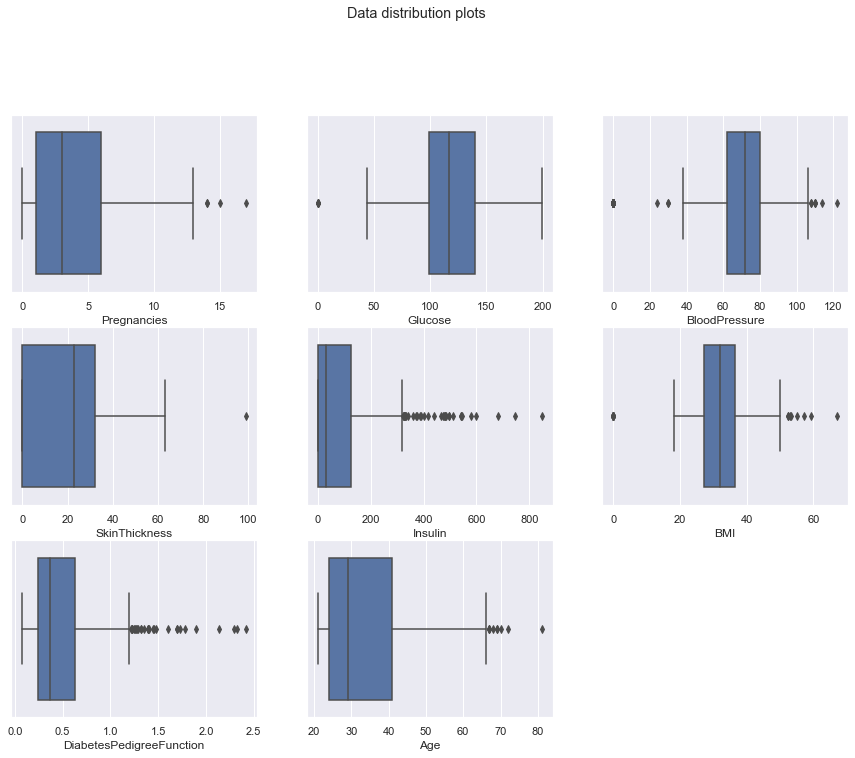

In [299]:
plt.figure(figsize=(no_of_columns*5, no_of_rows*5))
for i in range(len(predictors)):
    plt.subplot(no_of_rows + 1,no_of_columns,i+1)
    sns.boxplot(x=df[predictors[i]])
plt.suptitle("Data distribution plots")
plt.show()


0 count: 500
1 count: 268


C:\Users\L\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outcome distribution')

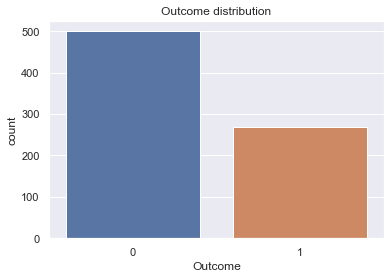

In [298]:
print('0 count:', len(df[df['Outcome']==0]))

print('1 count:', len(df[df['Outcome']==1]))


sns.countplot(df['Outcome']).set_title('Outcome distribution')

C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

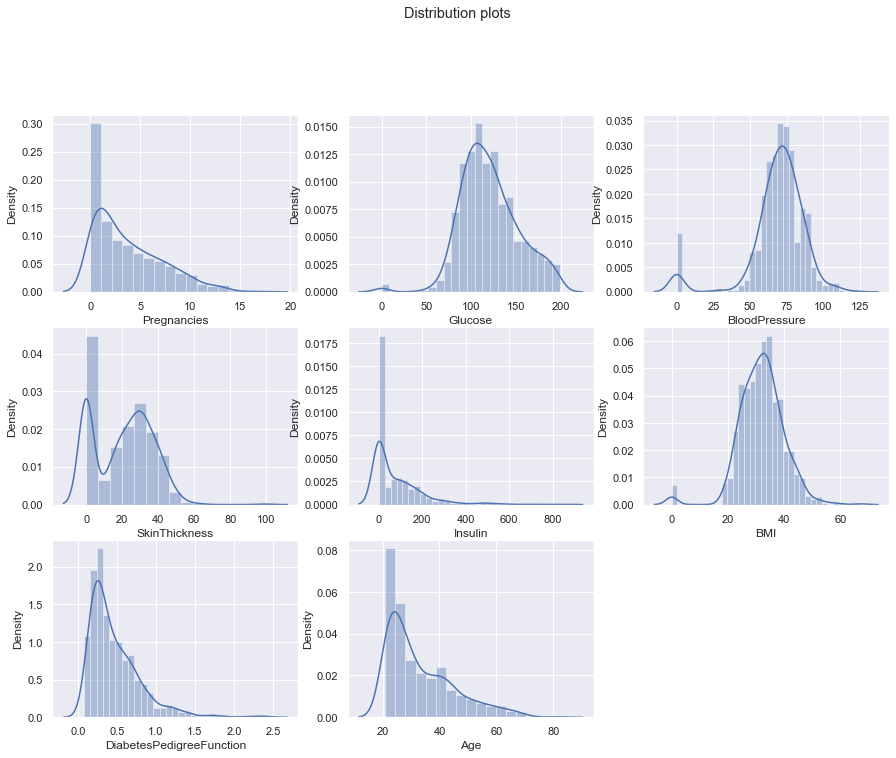

In [94]:
## Distribution plots to test skewness
predictors = df.columns[:-1]
no_of_columns=3
no_of_rows = 3

plt.figure(figsize=(no_of_columns*5, no_of_rows*5))
for i in range(len(predictors)):
    plt.subplot(no_of_rows + 1,no_of_columns,i+1)
    sns.distplot(df[predictors[i]],kde=True)
plt.suptitle("Distribution plots")
plt.show()



## Testing for zero entries

In [445]:
print("Entries with zero-valued glucose results:", len( df[df['Glucose']==0]) )

print("Entries with zero-valued blood pressure results:", len( df[df['BloodPressure']==0]) )

print("Entries with zero-valued skin thickness results:", len( df[df['SkinThickness']==0]) )

print("Entries with zero-valued insulin results:", len( df[df['Insulin']==0]) )

print("Entries with zero-valued BMI results:", len( df[df['BMI']==0]) )

print("\nTotal number of entries with at least 1 zero-valued result from the above features:",
      len(df[ (df['Glucose']==0) | (df['BloodPressure']==0)|
      (df['SkinThickness']==0) | (df['Insulin']==0) |  (df['BMI']==0) ]))

Entries with zero-valued glucose results: 5
Entries with zero-valued blood pressure results: 35
Entries with zero-valued skin thickness results: 227
Entries with zero-valued insulin results: 374
Entries with zero-valued BMI results: 11

Total number of entries with at least 1 zero-valued result from the above features: 376


## Imputation

### Mean inputation

In [148]:
df_imp = df.copy()

for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    imp_mean = df[df[i]!=0][i].mean()
    print(i, " mean:", imp_mean)
    df_imp[i] = df_imp[i].replace(0, imp_mean)

print("\nZero values replaced with non-zero feature means.")

print("\nTotal number of rows with at least 1 missing result:",
      len(df_imp[ (df_imp['Glucose']==0) | (df_imp['BloodPressure']==0)|
      (df_imp['SkinThickness']==0) | (df_imp['Insulin']==0) |  (df_imp['BMI']==0) ]))


Glucose  mean: 121.6867627785059
BloodPressure  mean: 72.40518417462484
SkinThickness  mean: 29.153419593345657
Insulin  mean: 155.5482233502538
BMI  mean: 32.45746367239099

Zero values replaced with non-zero feature means.

Total number of rows with at least 1 missing result: 0


C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

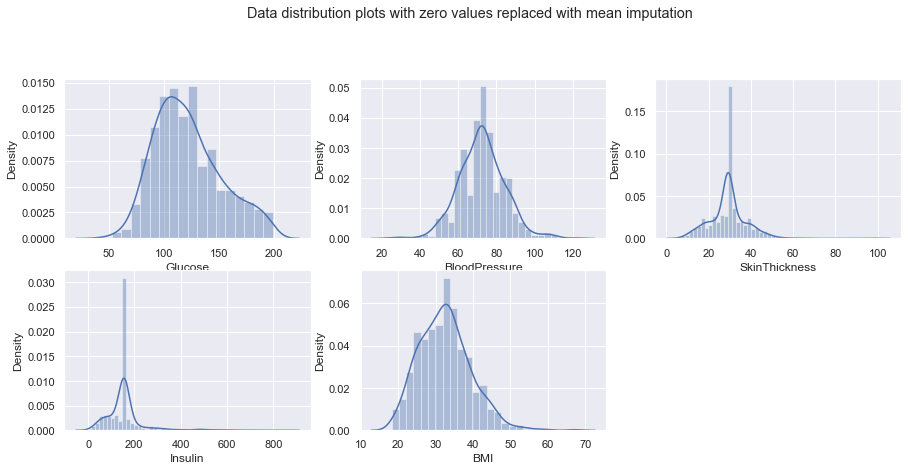

In [447]:
to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

## Distribution plots to test skewness
no_of_columns=3
no_of_rows = 2

plt.figure(figsize=(no_of_columns*5, no_of_rows*5))
for i in range(len(to_scale)):
    plt.subplot(no_of_rows + 1,no_of_columns,i+1)
    sns.distplot(df_imp[to_scale[i]],kde=True)
plt.suptitle("Data distribution plots with zero values replaced with mean imputation")
plt.show()


### MICE imputation

In [411]:
from fancyimpute import IterativeImputer

df_imp2 = df.copy()

for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df_imp2[i] = df[i].replace(0, np.nan)

# calling the  MICE class
mice_imputer = IterativeImputer()

# imputing the missing value with mice imputer
df_imp2 = mice_imputer.fit_transform(df_imp2)

df_imp2 = pd.DataFrame(df_imp2, columns= features)

df_imp2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,218.903553,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.314661,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.542781,268.507178,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,158.733147,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,27.913897,173.476992,30.1,0.349,47.0,1.0


C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

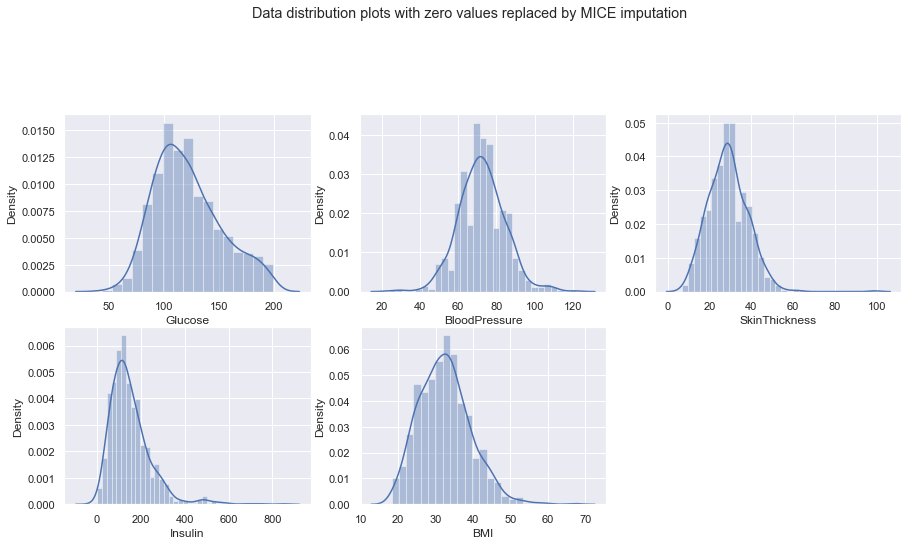

In [449]:
## Distribution plots to test skewness
no_of_columns=3
no_of_rows = 3

plt.figure(figsize=(no_of_columns*5, no_of_rows*5))
for i in range(len(to_scale)):
    plt.subplot(no_of_rows + 1,no_of_columns,i+1)
    sns.distplot(df_imp2[to_scale[i]],kde=True)
plt.suptitle("Data distribution plots with zero values replaced by MICE imputation")
plt.show()



## Outliers

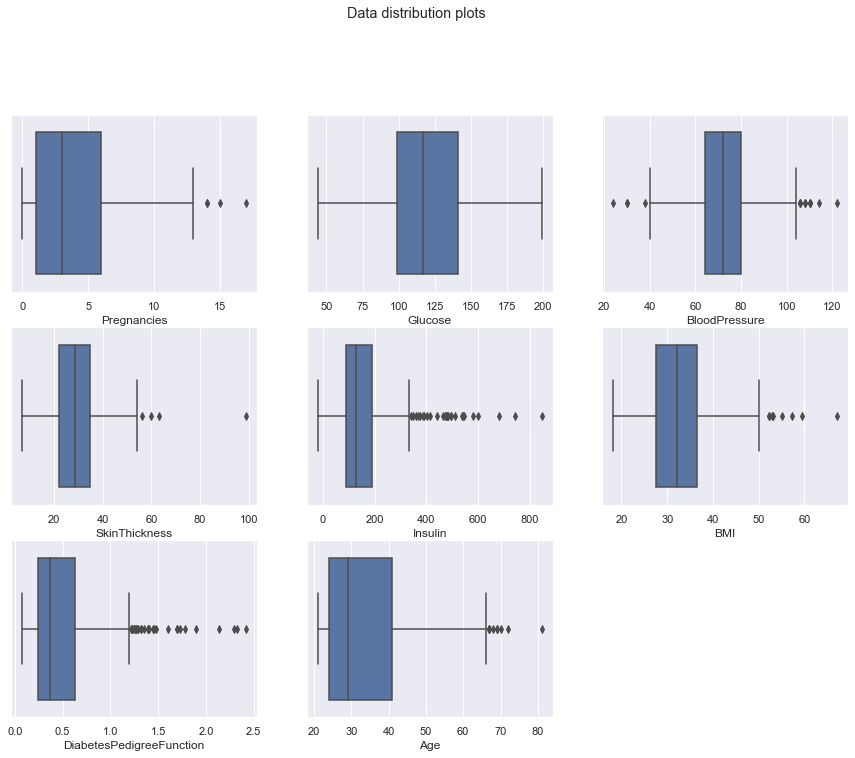

In [453]:

plt.figure(figsize=(no_of_columns*5, no_of_rows*5))
for i in range(len(predictors)):
    plt.subplot(no_of_rows + 1,no_of_columns,i+1)
    sns.boxplot(x=df_imp2[predictors[i]])
plt.suptitle("Data distribution plots")
plt.show()


In [454]:
df_imp2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.657925,72.351320,28.905434,152.683880,32.441484,0.471876,33.240885,0.348958
std,3.369578,30.486806,12.147653,9.522424,97.379029,6.879519,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,-19.501719,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.108834,89.995625,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.484103,130.127707,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [466]:
to_clean = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for i in to_clean:
    Q1= df_imp2[i].quantile(0.25)
    Q3 = df_imp2[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    print(i, "outliers:", len(df_imp2[ (df_imp2[i] > upper_limit) | (df_imp2[i] < lower_limit) ]) )
    #print(i, ":", lower_limit, upper_limit)

Pregnancies outliers: 4
BloodPressure outliers: 14
SkinThickness outliers: 4
Insulin outliers: 27
BMI outliers: 8
DiabetesPedigreeFunction outliers: 29


In [525]:
df_cleaned = df_imp2.copy()

for i in to_clean:
    Q1= df_imp2[i].quantile(0.25)
    Q3 = df_imp2[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_cleaned = df_cleaned.drop(df_cleaned[ (df_cleaned[i] > upper_limit) | (df_cleaned[i] < lower_limit) ].index)
    
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.iloc[: , 1:]
display(df_cleaned)
df_cleaned.shape


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,218.903553,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.314661,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.542781,268.507178,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,22.078010,125.695623,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
686,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
687,2.0,122.0,70.0,27.000000,158.733147,36.8,0.340,27.0,0.0
688,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
689,1.0,126.0,60.0,27.913897,173.476992,30.1,0.349,47.0,1.0


(691, 9)

<hr style="border:1px solid gray;">

## Scaling the data

<br>


#### Standardisation

In [526]:
from sklearn.preprocessing import StandardScaler

to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

scaler = StandardScaler().fit(df_cleaned[to_scale])

print("Pre-scaled distributions:\n")
for i in range(len(to_scale)):
    print(to_scale[i])
    print("  mean:", scaler.mean_[i])
    print("  variance:", scaler.scale_[i])
    print()

    
df_scaled_results = pd.DataFrame(scaler.transform(df_cleaned[to_scale]), columns = to_scale)

df_scaled = df_cleaned.copy()
for i in to_scale:
    df_scaled[i] = df_scaled_results[i]

    

scaler = StandardScaler().fit(df_scaled[to_scale])

print("\n\n\nPost-scaled distributions:\n")
for i in range(len(to_scale)):
    print(to_scale[i])
    print("  mean:", scaler.mean_[i])
    print("  variance:", scaler.scale_[i])
    print()
    

df_scaled.head()


Pre-scaled distributions:

Glucose
  mean: 119.446145199274
  variance: 29.16249227056369

BloodPressure
  mean: 72.03225211596283
  variance: 10.86443608621554

SkinThickness
  mean: 28.301109647748053
  variance: 8.804628718590289

Insulin
  mean: 138.96969492347588
  variance: 69.42701868730977

BMI
  mean: 31.93711054334984
  variance: 6.380582682480324




Post-scaled distributions:

Glucose
  mean: 7.969184084140052e-16
  variance: 1.0

BloodPressure
  mean: 3.701814542310218e-16
  variance: 0.9999999999999999

SkinThickness
  mean: -7.969184084140053e-17
  variance: 0.9999999999999999

Insulin
  mean: -2.4678763615401455e-16
  variance: 1.0

BMI
  mean: -6.696685335220915e-16
  variance: 1.0



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.979129,-0.002969,0.760837,1.151336,0.260617,0.627,50.0,1.0
1,1.0,-1.181180,-0.555229,0.079378,-0.988881,-0.836461,0.351,31.0,0.0
2,8.0,2.179301,-0.739316,-0.767588,1.865808,-1.353655,0.672,32.0,1.0
3,1.0,-1.044017,-0.555229,-0.602082,-0.647726,-0.601373,0.167,21.0,0.0
4,5.0,-0.118170,0.181118,-0.706799,-0.191195,-0.993187,0.201,30.0,0.0


C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\L\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

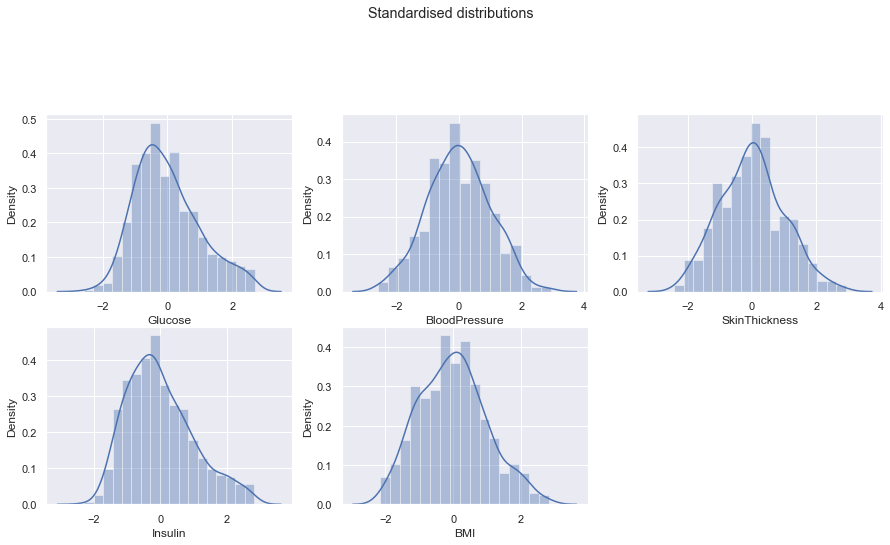

In [509]:
## Distribution plots to test skewness
no_of_columns=3
no_of_rows = 3

plt.figure(figsize=(no_of_columns*5, no_of_rows*5))
for i in range(len(to_scale)):
    plt.subplot(no_of_rows + 1,no_of_columns,i+1)
    sns.distplot(df_scaled[to_scale[i]],kde=True)
plt.suptitle("Standardised distributions")
plt.show()



### Correlations

In [530]:
correlation = df_scaled.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.144826,0.202014,0.150668,0.121013,0.037683,0.012931,0.535808,0.221515
Glucose,0.144826,1.000000,0.257075,0.190754,0.765456,0.210272,0.081075,0.284370,0.500606
BloodPressure,0.202014,0.257075,1.000000,0.247744,0.217570,0.292457,0.048434,0.354779,0.193888
SkinThickness,0.150668,0.190754,0.247744,1.000000,0.262831,0.719213,0.074515,0.149268,0.255684
Insulin,0.121013,0.765456,0.217570,0.262831,1.000000,0.318650,0.090840,0.281553,0.432949
BMI,0.037683,0.210272,0.292457,0.719213,0.318650,1.000000,0.135657,0.041688,0.296962
DiabetesPedigreeFunction,0.012931,0.081075,0.048434,0.074515,0.090840,0.135657,1.000000,0.062197,0.174703
Age,0.535808,0.284370,0.354779,0.149268,0.281553,0.041688,0.062197,1.000000,0.236992
Outcome,0.221515,0.500606,0.193888,0.255684,0.432949,0.296962,0.174703,0.236992,1.000000


<AxesSubplot:title={'center':'Pearson correlation coefficients'}>

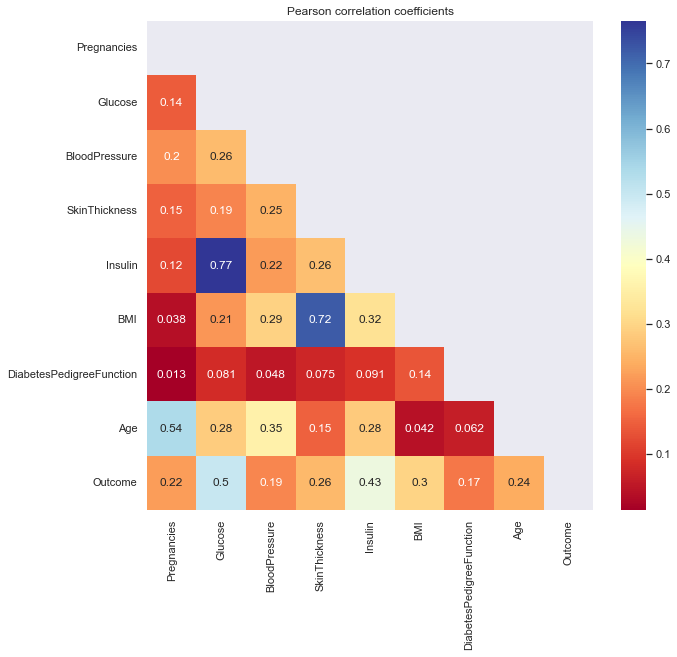

In [531]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats


plt.figure(figsize=(10,9))
plt.title("Pearson correlation coefficients")
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,annot=True, cmap = plt.cm.RdYlBu, mask=mask)

Text(0.5, 1, 'Pairwise feature plot, and outcome distributions per feature')

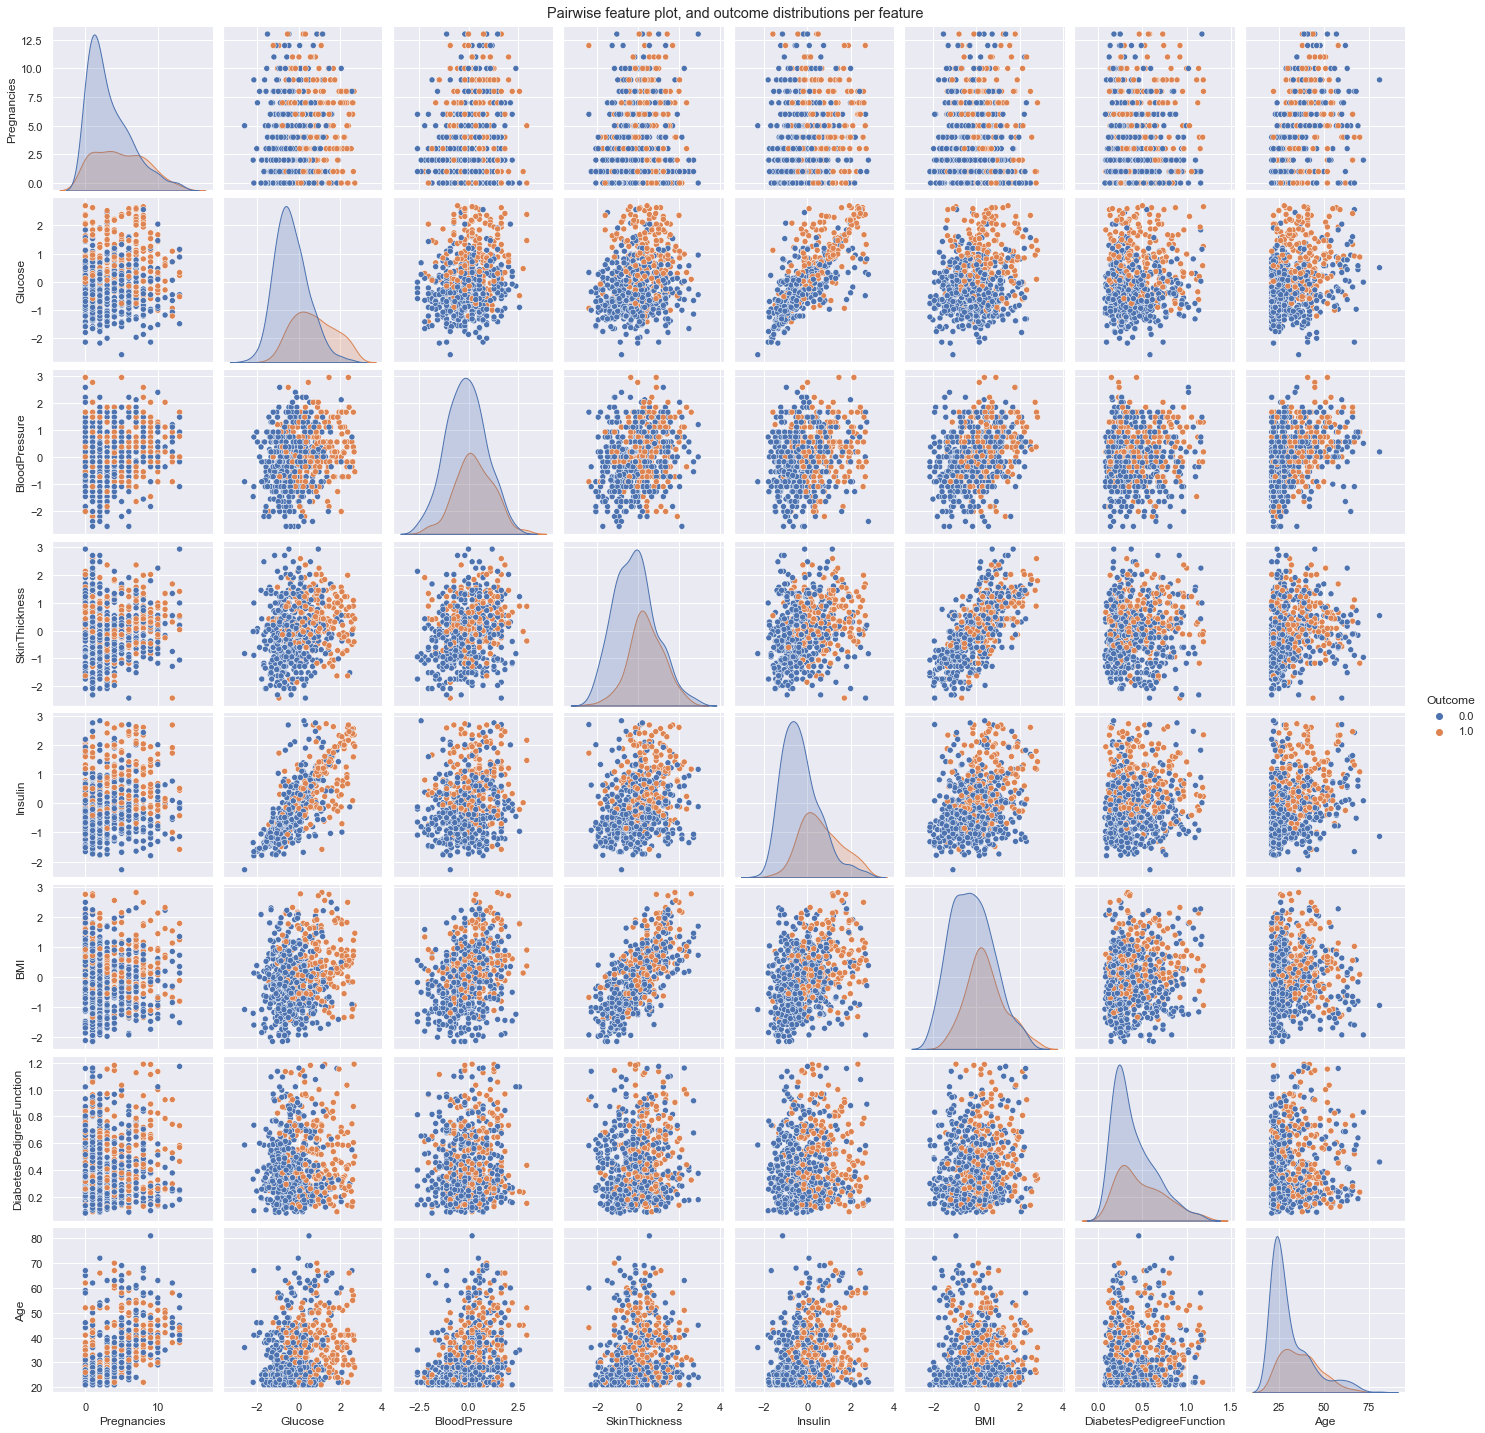

In [532]:
pairplot = sns.pairplot(df_scaled, height=2.5, hue="Outcome")

pairplot.fig.suptitle("Pairwise feature plot, and outcome distributions per feature", y=1)

#### Resampling for balanced outcomes

<AxesSubplot:xlabel='count', ylabel='Outcome'>

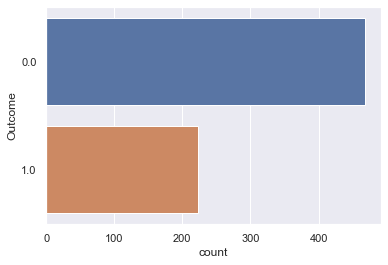

In [527]:
sns.countplot(y=df_scaled['Outcome'])

Original dataset shape Counter({0.0: 468, 1.0: 223})
Resampled dataset shape Counter({1.0: 468, 0.0: 468})


<AxesSubplot:xlabel='count', ylabel='Outcome'>

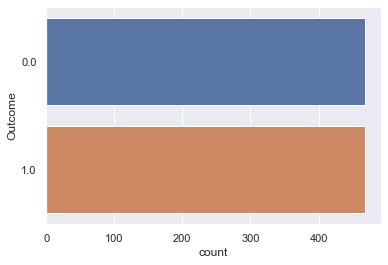

In [528]:
#class imblearn.over_sampling.SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 


print('Original dataset shape %s' % Counter(df_scaled['Outcome']))

sm = SMOTE(random_state=1)
X_balanced, y_balanced = sm.fit_resample(df_scaled[predictors], df_scaled['Outcome'])
print('Resampled dataset shape %s' % Counter(y_balanced))

sns.countplot(y=y_balanced)

#### Splitting the test / train data

In [501]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42)

# TRAINING

### Logistic regression

#### Train

In [568]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform

# Create an instance of Logistic Regression Classifier
model = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space

param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear'],'penalty':['none', 'l1', 'l2', 'elasticnet'],'C':loguniform(1e-5, 100)}
# define search
search = RandomizedSearchCV(model, param_grid, n_iter=1000, scoring=['accuracy', 'precision', 'f1', 'recall', 'roc_auc'], refit='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
#print('Best Score: %s' % result.best_score_)

result_summary = pd.DataFrame(result.cv_results_)


print('Best Hyperparameters: %s' % result.best_params_)
print('Accuracy:', round(result_summary.iloc[result.best_index_]['mean_test_accuracy'],5))
print('F1:', round(result_summary.iloc[result.best_index_]['mean_test_f1'],5))
print('ROC-AUC:', round(result_summary.iloc[result.best_index_]['mean_test_roc_auc'],5))

Best Hyperparameters: {'C': 0.9759138624593915, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.77405
F1: 0.7781
ROC-AUC: 0.85319


C:\Users\L\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.76641803        nan 0.76641803        nan 0.7511655  0.74809635
 0.68850816 0.69261072        nan        nan        nan        nan
 0.76641803        nan 0.76794872        nan        nan 0.76641803
 0.69310023        nan 0.76795649 0.73933178 0.76641803 0.69205128
 0.7674359         nan 0.76641803        nan 0.76641803 0.76846931
 0.68036519        nan 0.76641803        nan 0.76641803 0.76744367
        nan 0.76641803 0.51296037        nan 0.75522922 0.76896659
 0.51296037 0.75216783        nan 0.67935509        nan        nan
        nan        nan        nan 0.76641803        nan 0.76641803
        nan 0.76641803        nan        nan        nan        nan
 0.76641803        nan 0.77048951 0.74961927        nan 0.75018648
        nan 0.76795649 0.76641803 0.48703963        nan        nan
        nan        nan 0.76641803 0.77048951        nan 0

#### Test

In [594]:
model = LogisticRegression(C= 0.9759138624593915, penalty = 'l2', solver = 'liblinear')
tested = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", round(sklearn.metrics.accuracy_score(y_test,y_pred),5))
print("F1:", round(sklearn.metrics.f1_score(y_test,y_pred),5))
print("AUC:", round(sklearn.metrics.roc_auc_score(y_test,y_pred),5))

Accuracy: 0.71886
F1: 0.71273
AUC: 0.72021


### Random forest

#### Train

In [585]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier


# Create the random grid
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt','int','float','log2'],
               'max_depth': [3, 4, 5, 6, 7, 10, 15, 20 , None],#[int(x) for x in np.linspace(10, 110, num = 11)]
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               
               #'max_leaf_node' : [2, 5, 10, None],
               #'oob_score' : [True, False],
               'warm_start' : [True, False]
              
             },


# train the model on train set
model = RandomForestClassifier()

from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#search = GridSearchCV(model,param_grid,cv=cv,n_jobs=1,refit=True,scoring='neg_mean_absolute_error',verbose=2)
search = RandomizedSearchCV(model, param_grid, n_iter=100, scoring=['accuracy', 'precision', 'f1', 'recall', 'roc_auc'], refit='accuracy', n_jobs=-1, cv=cv, random_state=1, verbose=2)
result = search.fit(X_train, y_train)
    
result_summary = pd.DataFrame(result.cv_results_)


print('Best Hyperparameters: %s' % result.best_params_)
print('Accuracy:', round(result_summary.iloc[result.best_index_]['mean_test_accuracy'],5))
print('F1:', round(result_summary.iloc[result.best_index_]['mean_test_f1'],5))
print('ROC-AUC:', round(result_summary.iloc[result.best_index_]['mean_test_roc_auc'],5))

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


C:\Users\L\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.82898213 0.81324009        nan        nan 0.83254856 0.81324786
 0.82899767        nan 0.82800311        nan 0.81174825        nan
        nan 0.83              nan 0.83001554 0.81620824        nan
 0.831554   0.82796426 0.83152292 0.82491841        nan 0.82948718
 0.81118881 0.82032634 0.83303807 0.82747475 0.82846154        nan
 0.8193007  0.8442735  0.81524476 0.82393162 0.81223776        nan
 0.82594406 0.82493395 0.82034965 0.82644134 0.8101554         nan
 0.81886558 0.82949495 0.82290598 0.82897436        nan 0.80759907
        nan 0.83715618 0.83205128 0.84174048 0.80258741        nan
        nan        nan        nan 0.82646465        nan        nan
 0.81680653 0.84426573        nan 0.82952603        nan 0.83763015
 0.82897436 0.8289899         nan 0.83251748        nan        nan
 0.82289821        nan 0.82291375        nan 0.83609169 0

Best Hyperparameters: {'warm_start': False, 'n_estimators': 391, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Accuracy: 0.84427
F1: 0.8545
ROC-AUC: 0.91241


#### Test

In [595]:
model = RandomForestClassifier(warm_start= False, n_estimators= 391, min_samples_split= 5, min_samples_leaf= 2, max_features= 'sqrt', max_depth= None, bootstrap= False)
tested = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", round(sklearn.metrics.accuracy_score(y_test,y_pred),5))
print("F1:", round(sklearn.metrics.f1_score(y_test,y_pred),5))
print("AUC:", round(sklearn.metrics.roc_auc_score(y_test,y_pred),5))

Accuracy: 0.79004
F1: 0.78545
AUC: 0.79164


### XGBoost

#### Train

In [581]:
from xgboost import XGBClassifier
#from xgboost import XGBRegressor



# defining parameter range
# param_grid = space
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.4, 0.6, 0.8, 1.0, 1.2],
        'colsample_bytree': [0.4, 0.6, 0.8, 1.0, 1.2],
        'max_depth': [3, 4, 5,6,7,8,9,10,11,12,None],
        'learning_rate': [0.2,0.02,0.002],
        'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
        }


# train the model on train set
model = XGBClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#search = GridSearchCV(model,param_grid,cv=None,n_jobs=1,refit=True,scoring='neg_mean_absolute_error',verbose=0)
search = RandomizedSearchCV(model, param_grid, n_iter=1000, scoring=['accuracy', 'precision', 'f1', 'recall', 'roc_auc'], refit='accuracy', n_jobs=-1, cv=cv, random_state=1, verbose=2)

result = search.fit(X_train, y_train)
    

result_summary = pd.DataFrame(result.cv_results_)


print('Best Hyperparameters: %s' % result.best_params_)
print('Accuracy:', round(result_summary.iloc[result.best_index_]['mean_test_accuracy'],5))
print('F1:', round(result_summary.iloc[result.best_index_]['mean_test_f1'],5))
print('ROC-AUC:', round(result_summary.iloc[result.best_index_]['mean_test_roc_auc'],5))

Fitting 30 folds for each of 1000 candidates, totalling 30000 fits


C:\Users\L\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.81523699 0.80254079        nan        nan 0.78468531
 0.78420357        nan 0.82839938 0.82589744 0.8254157         nan
 0.79540016 0.79890443 0.81934732        nan        nan 0.81065268
 0.80405594        nan        nan 0.82289044 0.81625486 0.76236208
 0.82289821 0.78721834        nan 0.79493395 0.8056488  0.81781663
        nan        nan 0.81369852 0.77099456 0.82796426 0.8167366
 0.82693085 0.82235431 0.82082362        nan        nan 0.79285159
        nan        nan        nan        nan        nan        nan
 0.80351981 0.82742813 0.82637918 0.78627817 0.80762238 0.83149961
 0.82440559 0.79847708 0.81469308 0.81930847 0.79491064 0.83205128
 0.83512044 0.81925408 0.80559441 0.81983683 0.82797203 0.80461538
 0.83409479 0.79899767        nan 0.82393162 0.80198912 0.78111111
        nan 0.82898213 0.79031857 0.81320901        nan 0.

[08:01:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 391, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.02, 'gamma': 0.1, 'colsample_bytree': 0.6}
Accuracy: 0.83712
F1: 0.84691
ROC-AUC: 0.90685


#### Test

In [596]:
model = XGBClassifier(subsample=1, n_estimators=391, min_child_weight=1, max_depth=12, learning_rate = 0.02, gamma = 0.1, colsample_bytree = 0.6)
tested = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", round(sklearn.metrics.accuracy_score(y_test,y_pred),5))
print("F1:", round(sklearn.metrics.f1_score(y_test,y_pred),5))
print("AUC:", round(sklearn.metrics.roc_auc_score(y_test,y_pred),5))

C:\Users\L\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:18:31] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.78292
F1: 0.78136
AUC: 0.78536


### CatBoost

#### Train

In [580]:
from catboost import CatBoostClassifier

param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)],
        'subsample': [0.4, 0.6, 0.8, 1.0, 1.2],
        #'max_depth': [3, 4, 5,6,7,8,9,10,11,12,None],
        'learning_rate': [0.2,0.02,0.002]
        }


# Initialize CatBoostClassifier
model = CatBoostClassifier()
# Fit model
                               
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = RandomizedSearchCV(model, param_grid, n_iter=1000, scoring=['accuracy', 'precision', 'f1', 'recall', 'roc_auc'], refit='accuracy', n_jobs=-1, cv=cv, random_state=1, verbose=2)
                               
#model.fit(train_data, train_labels, cat_features)
result = search.fit(X_train, y_train)
# Get predicted classes
y_pred = result.predict(X_test)
# Get predicted probabilities for each class
#preds_proba = model.predict_proba(X_test)
# Get predicted RawFormulaVal
#preds_raw = model.predict(eval_data, prediction_type='RawFormulaVal')

result_summary = pd.DataFrame(result.cv_results_)


print('Best Hyperparameters: %s' % result.best_params_)
print('Accuracy:', round(result_summary.iloc[result.best_index_]['mean_test_accuracy'],5))
print('F1:', round(result_summary.iloc[result.best_index_]['mean_test_f1'],5))
print('ROC-AUC:', round(result_summary.iloc[result.best_index_]['mean_test_roc_auc'],5))


C:\Users\L\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 150 is smaller than n_iter=1000. Running 150 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 30 folds for each of 150 candidates, totalling 4500 fits


C:\Users\L\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.79952603 0.80408702 0.81021756 0.80609946        nan 0.81783994
 0.82132867 0.82138306 0.82289044        nan 0.81983683 0.82694639
 0.82337995 0.82133644        nan 0.82390054 0.82592075 0.82183372
 0.82184149        nan 0.82949495 0.83457653 0.82491841 0.82899767
        nan 0.83103341 0.83356643 0.82390054 0.82950272        nan
 0.83103341 0.83306138 0.8228749  0.83001554        nan 0.82951826
 0.83204351 0.82337995 0.83001554        nan 0.83053613 0.83204351
 0.82337995 0.83001554        nan 0.82951049 0.83205128 0.82337218
 0.83001554        nan 0.78989899 0.78578866 0.7959596  0.79799534
        nan 0.81174048 0.80917638 0.80916084 0.80508936        nan
 0.81477078 0.81171717 0.81577312 0.81525253        nan 0.8182906
 0.81424242 0.82084693 0.82034188        nan 0.8320202  0.83049728
 0.82641803 0.8310101         nan 0.83355089 0.8310101  0.

0:	learn: 0.5828744	total: 49.4ms	remaining: 11.2s
1:	learn: 0.5166104	total: 50.9ms	remaining: 5.72s
2:	learn: 0.4756394	total: 51.9ms	remaining: 3.88s
3:	learn: 0.4323807	total: 53ms	remaining: 2.96s
4:	learn: 0.4076606	total: 54.1ms	remaining: 2.4s
5:	learn: 0.3840390	total: 55.1ms	remaining: 2.03s
6:	learn: 0.3654970	total: 56.1ms	remaining: 1.76s
7:	learn: 0.3489753	total: 57.2ms	remaining: 1.56s
8:	learn: 0.3378570	total: 58.2ms	remaining: 1.41s
9:	learn: 0.3263419	total: 59.2ms	remaining: 1.28s
10:	learn: 0.3143006	total: 60.2ms	remaining: 1.18s
11:	learn: 0.3060186	total: 61.3ms	remaining: 1.1s
12:	learn: 0.2998939	total: 62.3ms	remaining: 1.02s
13:	learn: 0.2924862	total: 63.3ms	remaining: 964ms
14:	learn: 0.2864159	total: 64.3ms	remaining: 909ms
15:	learn: 0.2760153	total: 65.3ms	remaining: 861ms
16:	learn: 0.2656247	total: 66.3ms	remaining: 819ms
17:	learn: 0.2574853	total: 67.3ms	remaining: 782ms
18:	learn: 0.2513049	total: 68.4ms	remaining: 748ms
19:	learn: 0.2457886	total

#### Test

In [597]:
model = CatBoostClassifier(subsample = 0.6, n_estimators = 227, learning_rate = 0.2)
tested = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", round(sklearn.metrics.accuracy_score(y_test,y_pred),5))
print("F1:", round(sklearn.metrics.f1_score(y_test,y_pred),5))
print("AUC:", round(sklearn.metrics.roc_auc_score(y_test,y_pred),5))

0:	learn: 0.5828744	total: 14.6ms	remaining: 3.31s
1:	learn: 0.5166104	total: 15.7ms	remaining: 1.77s
2:	learn: 0.4756394	total: 16.7ms	remaining: 1.25s
3:	learn: 0.4323807	total: 17.7ms	remaining: 986ms
4:	learn: 0.4076606	total: 18.7ms	remaining: 828ms
5:	learn: 0.3840390	total: 19.7ms	remaining: 727ms
6:	learn: 0.3654970	total: 20.8ms	remaining: 653ms
7:	learn: 0.3489753	total: 21.8ms	remaining: 598ms
8:	learn: 0.3378570	total: 22.9ms	remaining: 555ms
9:	learn: 0.3263419	total: 23.9ms	remaining: 519ms
10:	learn: 0.3143006	total: 24.9ms	remaining: 489ms
11:	learn: 0.3060186	total: 25.9ms	remaining: 463ms
12:	learn: 0.2998939	total: 26.8ms	remaining: 441ms
13:	learn: 0.2924862	total: 27.8ms	remaining: 423ms
14:	learn: 0.2864159	total: 28.9ms	remaining: 408ms
15:	learn: 0.2760153	total: 29.9ms	remaining: 394ms
16:	learn: 0.2656247	total: 30.9ms	remaining: 381ms
17:	learn: 0.2574853	total: 31.8ms	remaining: 369ms
18:	learn: 0.2513049	total: 32.8ms	remaining: 359ms
19:	learn: 0.2457886	t

175:	learn: 0.0173045	total: 188ms	remaining: 54.4ms
176:	learn: 0.0171517	total: 189ms	remaining: 53.4ms
177:	learn: 0.0171071	total: 190ms	remaining: 52.3ms
178:	learn: 0.0168589	total: 191ms	remaining: 51.3ms
179:	learn: 0.0166334	total: 192ms	remaining: 50.2ms
180:	learn: 0.0164057	total: 193ms	remaining: 49.1ms
181:	learn: 0.0162544	total: 194ms	remaining: 48ms
182:	learn: 0.0160637	total: 195ms	remaining: 46.9ms
183:	learn: 0.0158261	total: 196ms	remaining: 45.8ms
184:	learn: 0.0156612	total: 197ms	remaining: 44.7ms
185:	learn: 0.0155738	total: 198ms	remaining: 43.7ms
186:	learn: 0.0155513	total: 199ms	remaining: 42.6ms
187:	learn: 0.0153775	total: 200ms	remaining: 41.6ms
188:	learn: 0.0152217	total: 201ms	remaining: 40.5ms
189:	learn: 0.0150667	total: 202ms	remaining: 39.4ms
190:	learn: 0.0149952	total: 204ms	remaining: 38.4ms
191:	learn: 0.0147540	total: 205ms	remaining: 37.3ms
192:	learn: 0.0145814	total: 206ms	remaining: 36.2ms
193:	learn: 0.0144027	total: 207ms	remaining: 35

### KNN

#### Train

In [579]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
#n_neighbors=3
model.fit(X_train, y_train)

param_grid = {'n_neighbors': np.arange(1,25),
              'metric' : ['euclidean', 'manhattan', 'minkowski'],
              'weights' : ['uniform', 'distance']
        }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#search = RandomizedSearchCV(model, param_grid, n_iter=1000, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1, verbose=2)
search = GridSearchCV(model,param_grid, scoring=['accuracy', 'precision', 'f1', 'recall', 'roc_auc'], refit='accuracy', n_jobs=-1, cv=cv, verbose=2)
result = search.fit(X_train, y_train)

result_summary = pd.DataFrame(result.cv_results_)


print('Best Hyperparameters: %s' % result.best_params_)
print('Accuracy:', round(result_summary.iloc[result.best_index_]['mean_test_accuracy'],5))
print('F1:', round(result_summary.iloc[result.best_index_]['mean_test_f1'],5))
print('ROC-AUC:', round(result_summary.iloc[result.best_index_]['mean_test_roc_auc'],5))

Fitting 30 folds for each of 144 candidates, totalling 4320 fits
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.81479
F1: 0.83312
ROC-AUC: 0.81247


#### Test

In [598]:
model = KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='uniform')
tested = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", round(sklearn.metrics.accuracy_score(y_test,y_pred),5))
print("F1:", round(sklearn.metrics.f1_score(y_test,y_pred),5))
print("AUC:", round(sklearn.metrics.roc_auc_score(y_test,y_pred),5))

Accuracy: 0.81851
F1: 0.8223
AUC: 0.82281
